Installing Necessary Packages

In [ ]:
# Install Faker package

!pip install faker
from faker import Faker

# Install Pandas package

!pip install pandas
import pandas as pd

Dataset creation

In [ ]:
# Synthetic dataset creation

from faker import Faker
import pandas as pd
import random

# Initialize Faker
fake = Faker("en_IN")  # Indian locale for realistic data

# Function to generate synthetic transactional data
def generate_transactional_data(n=100000):
    data = []
    for _ in range(n):
        # Generate unique IDs
        customer_id = fake.uuid4()
        transaction_id = fake.uuid4()

        # Generate transaction details
        transaction_amount = round(random.uniform(100, 100000), 2)  # Amount in INR
        transaction_type = random.choice(["Deposit", "Withdrawal", "Transfer", "Bill Payment"])
        transaction_date = fake.date_between(start_date="-5y", end_date="today")

        # Additional parameters
        account_type = random.choice(["Savings", "Current"])
        branch_name = fake.city()
        currency = "INR"

        # Add transaction details to dataset
        transaction = {
            "Customer_ID": customer_id,
            "Transaction_ID": transaction_id,
            "Transaction_Amount": transaction_amount,
            "Transaction_Type": transaction_type,
            "Transaction_Date": transaction_date,
            "Account_Type": account_type,
            "Branch_Name": branch_name,
            "Currency": currency,
        }
        data.append(transaction)

    # Create DataFrame
    return pd.DataFrame(data)

# Generate the dataset
transactional_data = generate_transactional_data(n=100000)

# Save to CSV
transactional_data.to_csv("transactional_data.csv", index=False)


In [ ]:
# Read the dataset

df = pd.read_csv(r"/content/transactional_data.csv")
df

,Customer_ID,Transaction_ID,Transaction_Amount,Transaction_Type,Transaction_Date,Account_Type,Branch_Name,Currency
0,b318556f-1fdd-4ee5-906b-ab23fd7b4504,6b6807b1-8f32-4f89-8400-e0165b9859d5,72638.53,Transfer,2020-12-15,Savings,Ujjain,INR
1,1f7e6274-e1a8-4139-b2ad-a00f36580bed,e168d748-5b2e-4f5d-9fff-920fbd656590,50841.98,Deposit,2020-10-04,Savings,Maheshtala,INR
2,f1425ca8-b0b5-4689-9fc9-ac857f202e8a,31538759-0ebf-4879-b2ff-ad8fd36cf89c,54103.29,Withdrawal,2022-08-01,Savings,Moradabad,INR
3,067f0f2a-714c-4a13-9f4b-9c4975ca6e4c,da2cccd7-197a-4ece-a0b7-9d6a507190e1,38454.53,Deposit,2023-10-20,Current,Jamnagar,INR
4,7676cb2e-258f-4c62-9645-d9435fec3391,7c950e98-df23-460d-9a3f-29862424bdd5,32176.25,Deposit,2023-04-05,Savings,Kottayam,INR
...,...,...,...,...,...,...,...,...
99995,b295b144-5a64-417d-b6e8-7e6b2d50a837,9acb8fbe-ce49-48b3-ac59-363276766f12,96629.38,Transfer,2020-09-24,Savings,Malegaon,INR
99996,ba732f68-ee9f-426c-9c31-dc7ce6980ee4,67e6386b-1e99-4d14-8c0d-05d55ccfe388,85673.60,Transfer,2021-02-03,Savings,Fatehpur,INR
99997,074afe50-0818-4f54-ab5f-fd89214e91f8,70b091e9-4bfd-4801-a137-57a523b236c5,32958.37,Transfer,2022-05-26,Current,Unnao,INR
99998,93426ea8-eeef-4811-b5f1-ff481e271a1f,f6cbfda0-50f7-41b3-95c3-dd232e42c711,77698.16,Deposit,2021-10-17,Savings,Belgaum,INR


Data Cleaning

In [ ]:
# looking for NaN values

df.isnull().values.any()  # looking for NaN values

False

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Transaction_ID,0
Transaction_Amount,0
Transaction_Type,0
Transaction_Date,0
Account_Type,0
Branch_Name,0
Currency,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer_ID         100000 non-null  object 
 1   Transaction_ID      100000 non-null  object 
 2   Transaction_Amount  100000 non-null  float64
 3   Transaction_Type    100000 non-null  object 
 4   Transaction_Date    100000 non-null  object 
 5   Account_Type        100000 non-null  object 
 6   Branch_Name         100000 non-null  object 
 7   Currency            100000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


Package Installation

In [ ]:
# Missingno package installation

!pip install missingno
import missingno as msno

# Matplotlib package installation

!pip install matplotlib
import matplotlib.pyplot as plt

# Seaborn package installation

!pip install seaborn
import seaborn as sns

EDA

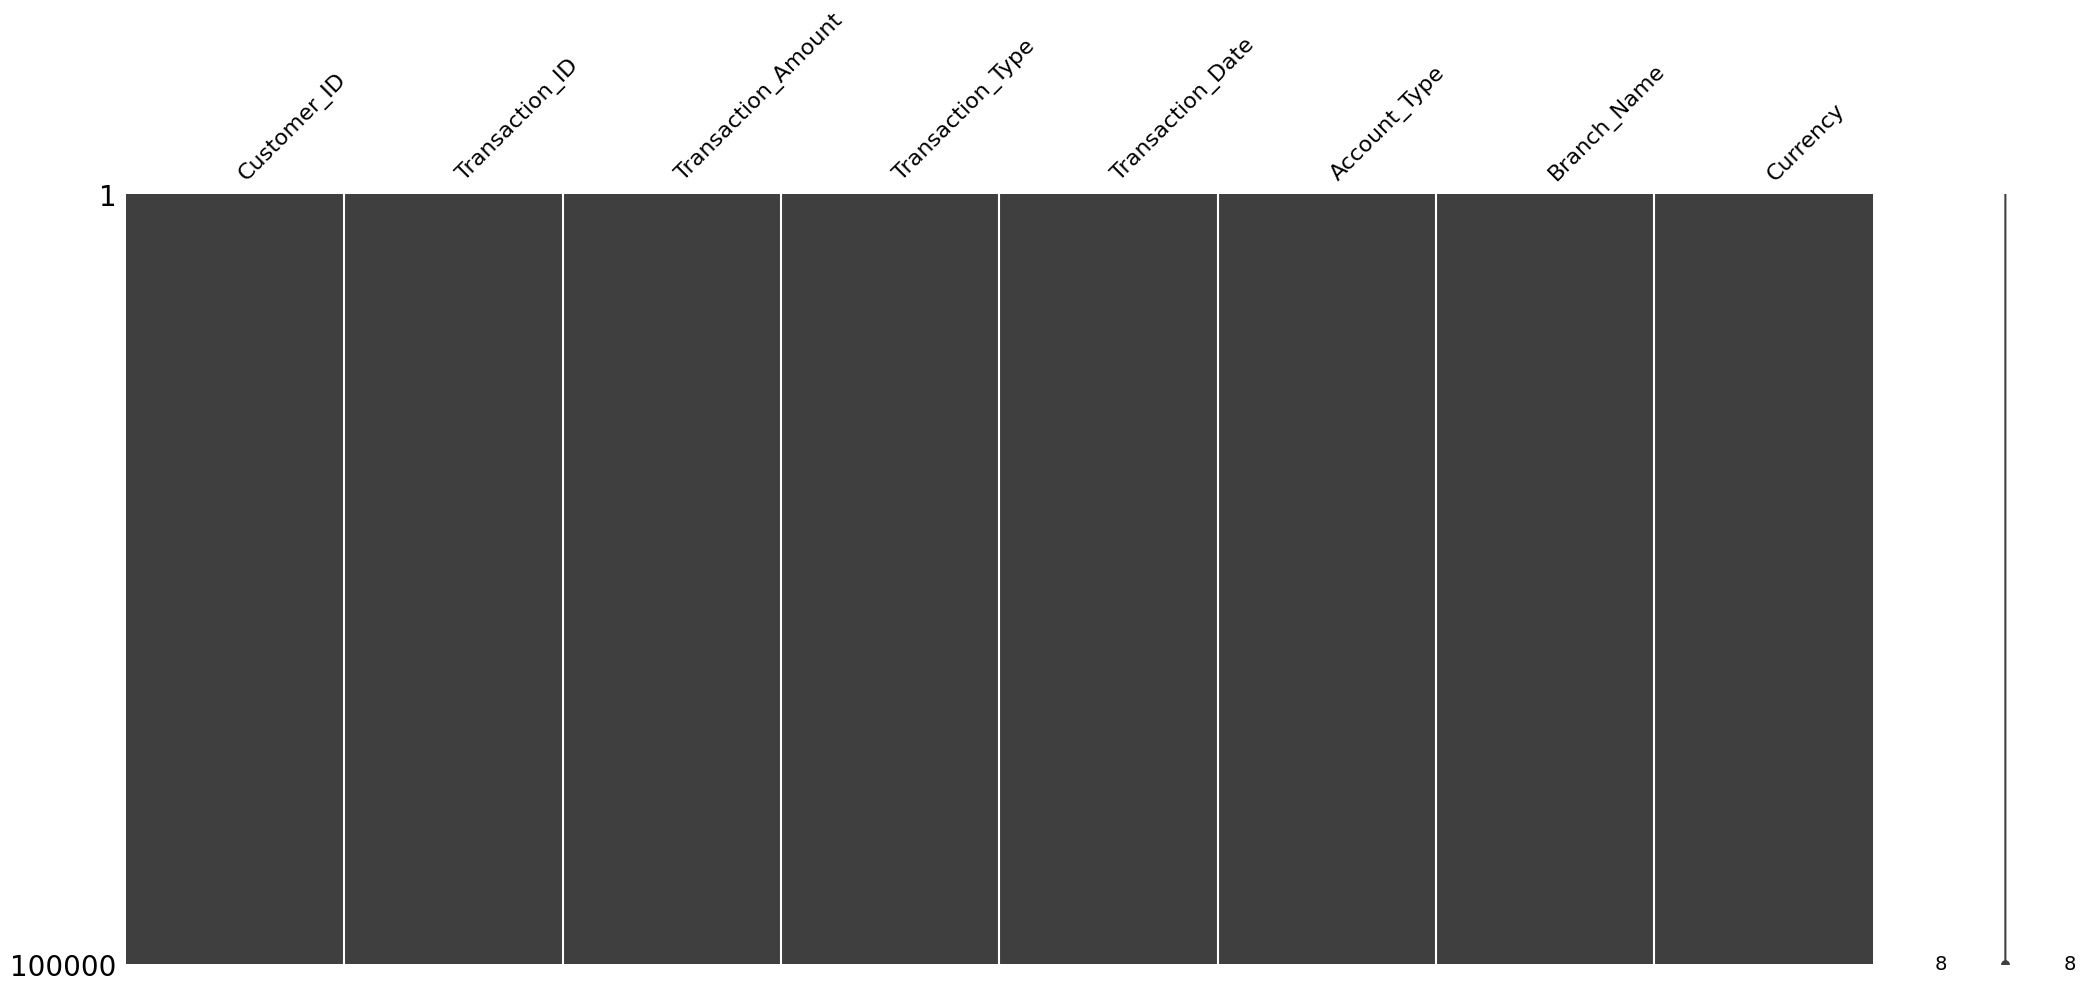

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer_ID         100000 non-null  object        
 1   Transaction_ID      100000 non-null  object        
 2   Transaction_Amount  100000 non-null  float64       
 3   Transaction_Type    100000 non-null  object        
 4   Transaction_Date    100000 non-null  datetime64[ns]
 5   Account_Type        100000 non-null  object        
 6   Branch_Name         100000 non-null  object        
 7   Currency            100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 6.1+ MB


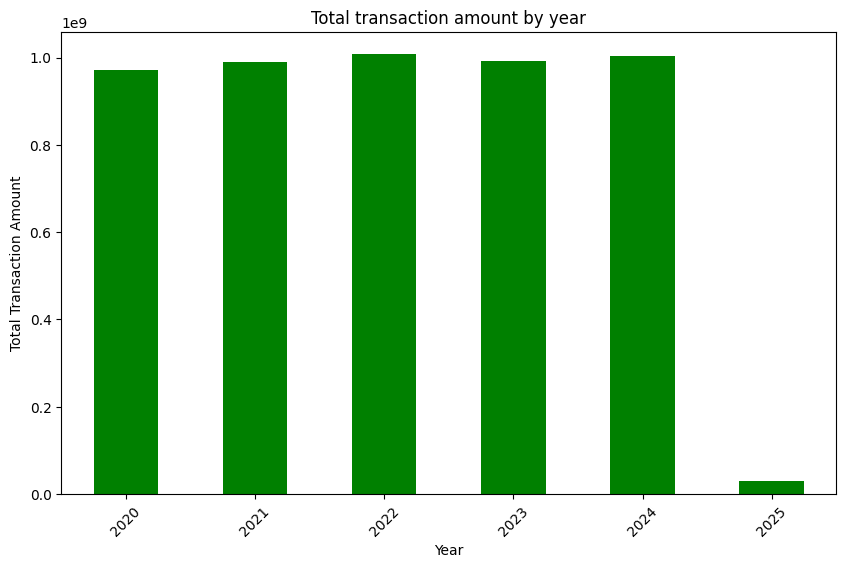

In [ ]:
# Extract the year and group by it
df['Year'] = df['Transaction_Date'].dt.year
yearly_transactions = df.groupby('Year')['Transaction_Amount'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
yearly_transactions.plot(kind='bar', color='green')
plt.title("Total transaction amount by year")
plt.xlabel("Year")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()

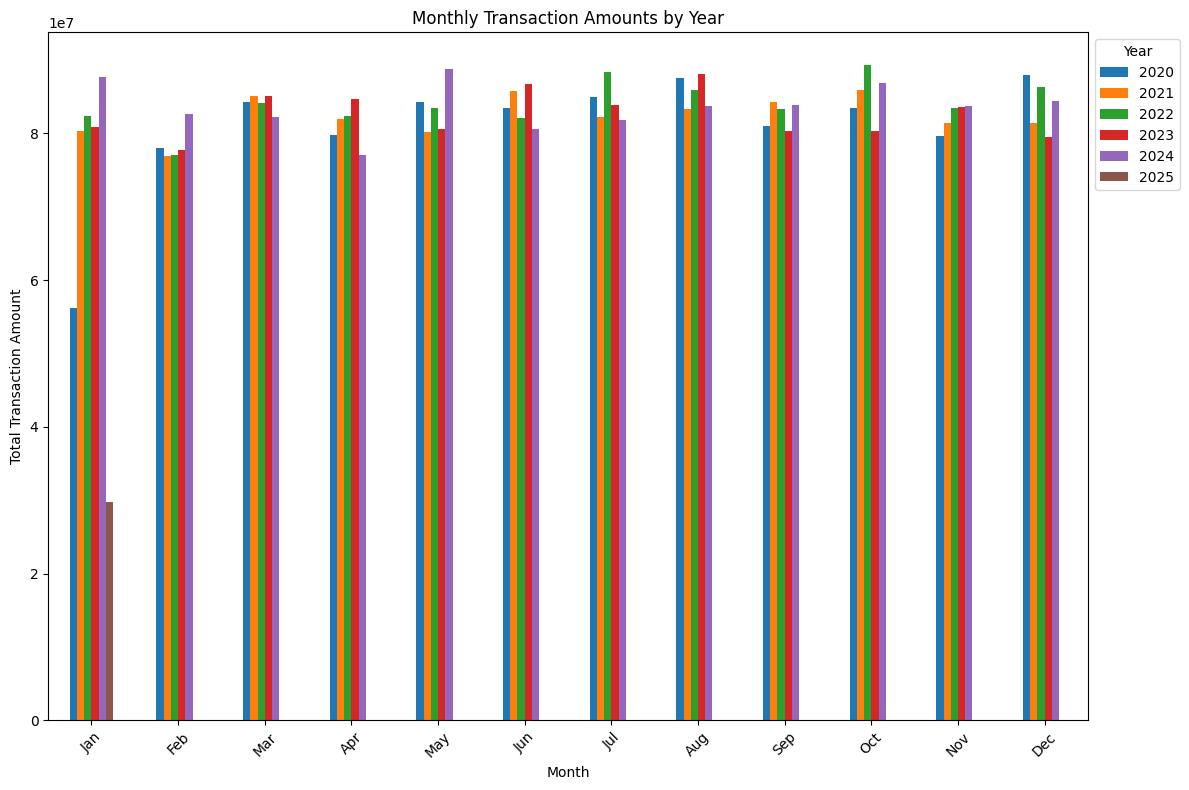

In [ ]:
# Extract the year and month
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month

# Group by Year and Month, and calculate total transaction amounts
year_month_transactions = df.groupby(['Year', 'Month'])['Transaction_Amount'].sum().reset_index()

# Pivot the data to create a Year vs. Month table
pivot_table = year_month_transactions.pivot(index='Month', columns='Year', values='Transaction_Amount')

# Plot grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title("Monthly Transaction Amounts by Year")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

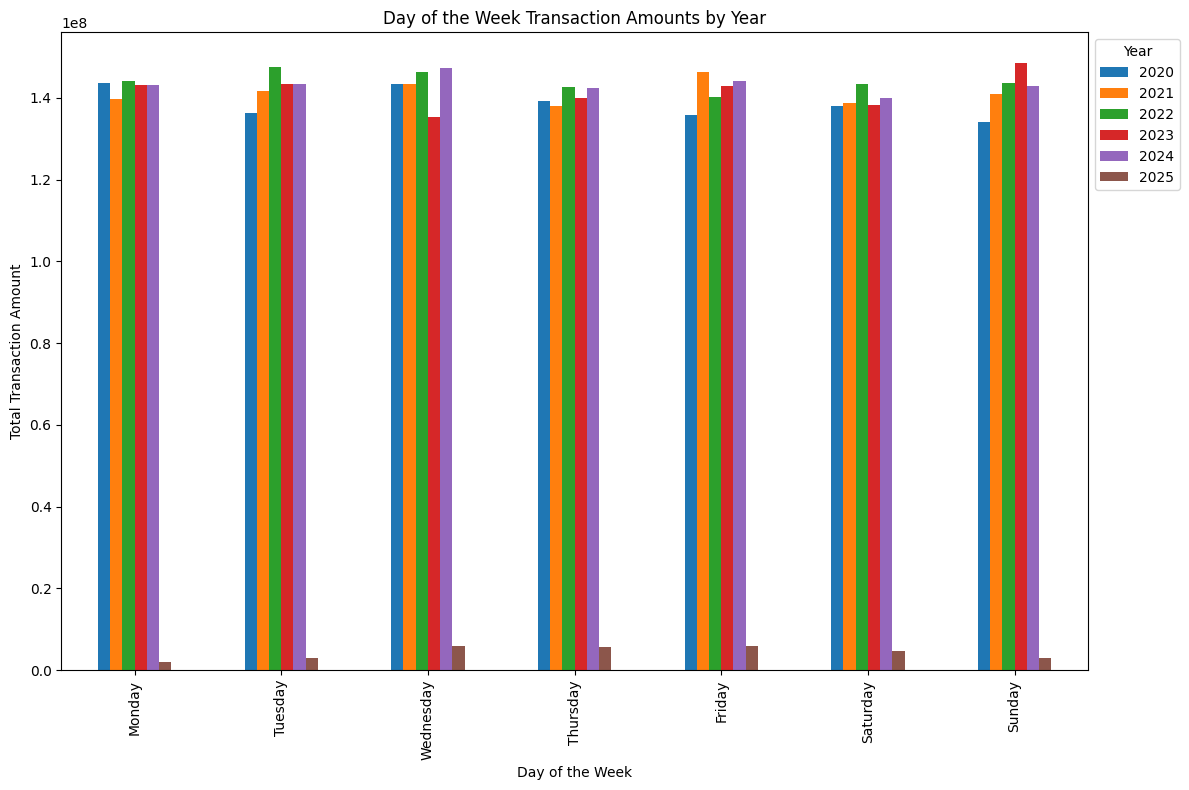

In [ ]:
# Extract Day of the Week
df['Day_of_Week'] = df['Transaction_Date'].dt.day_name()

# Group by Year and Day of the Week and calculate total transaction amounts
day_transactions = df.groupby(['Year', 'Day_of_Week'])['Transaction_Amount'].sum().reset_index()

# Order days of the week
day_transactions['Day_of_Week'] = pd.Categorical(day_transactions['Day_of_Week'],
                                                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                 ordered=True)

# Pivot for Bar Chart
pivot_days = day_transactions.pivot(index='Day_of_Week', columns='Year', values='Transaction_Amount')

# Plot grouped bar chart
pivot_days.plot(kind='bar', figsize=(12, 8))
plt.title("Day of the Week Transaction Amounts by Year")
plt.xlabel("Day of the Week")
plt.ylabel("Total Transaction Amount")
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


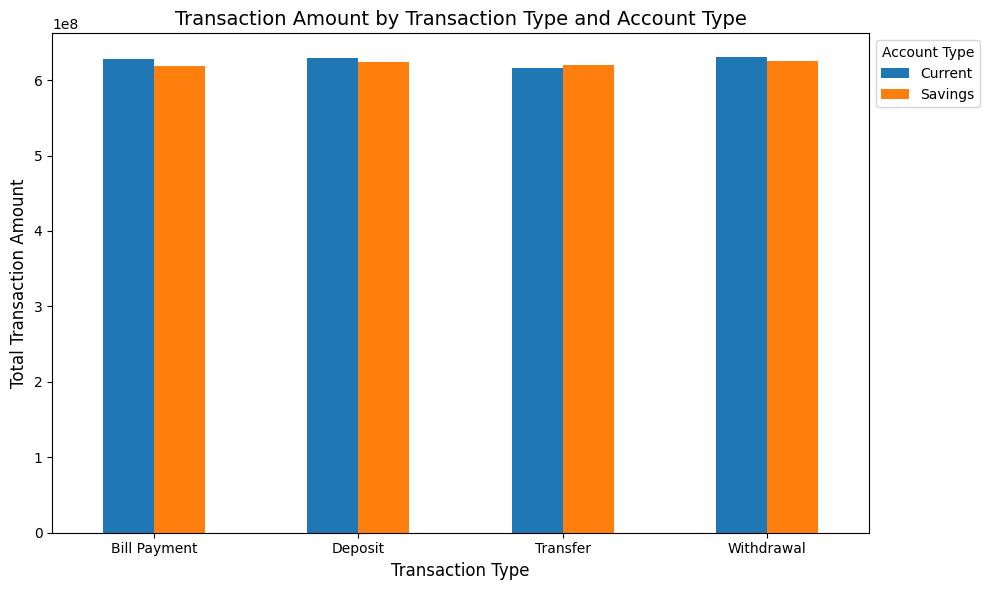

In [ ]:
# Create pivot table: Rows = Transaction_Type, Columns = Account_Type, Values = sum of Transaction_Amount
pivot_table = df.pivot_table(values='Transaction_Amount',
                             index='Transaction_Type',
                             columns='Account_Type',
                             aggfunc='sum', fill_value=0)

# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False, figsize=(10, 6))

# Set the labels and title
plt.title('Transaction Amount by Transaction Type and Account Type', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Account Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()


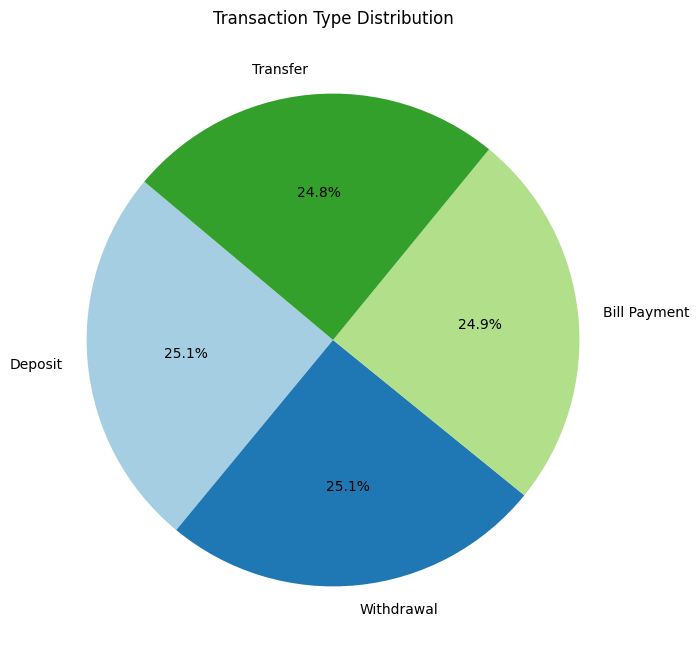

In [ ]:
# Group by Transaction_Type and count or sum transaction amounts
transaction_type_counts = df['Transaction_Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
transaction_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Transaction Type Distribution")
plt.ylabel("")
plt.show()

Preprocessing

In [ ]:
# Count transactions per customer

df['Transaction_Count'] = df.groupby('Customer_ID')['Transaction_ID'].transform('count')
df

,Customer_ID,Transaction_ID,Transaction_Amount,Transaction_Type,Transaction_Date,Account_Type,Branch_Name,Currency,Year,Month,Day_of_Week,Transaction_Count
0,b318556f-1fdd-4ee5-906b-ab23fd7b4504,6b6807b1-8f32-4f89-8400-e0165b9859d5,72638.53,Transfer,2020-12-15,Savings,Ujjain,INR,2020,12,Tuesday,1
1,1f7e6274-e1a8-4139-b2ad-a00f36580bed,e168d748-5b2e-4f5d-9fff-920fbd656590,50841.98,Deposit,2020-10-04,Savings,Maheshtala,INR,2020,10,Sunday,1
2,f1425ca8-b0b5-4689-9fc9-ac857f202e8a,31538759-0ebf-4879-b2ff-ad8fd36cf89c,54103.29,Withdrawal,2022-08-01,Savings,Moradabad,INR,2022,8,Monday,1
3,067f0f2a-714c-4a13-9f4b-9c4975ca6e4c,da2cccd7-197a-4ece-a0b7-9d6a507190e1,38454.53,Deposit,2023-10-20,Current,Jamnagar,INR,2023,10,Friday,1
4,7676cb2e-258f-4c62-9645-d9435fec3391,7c950e98-df23-460d-9a3f-29862424bdd5,32176.25,Deposit,2023-04-05,Savings,Kottayam,INR,2023,4,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,b295b144-5a64-417d-b6e8-7e6b2d50a837,9acb8fbe-ce49-48b3-ac59-363276766f12,96629.38,Transfer,2020-09-24,Savings,Malegaon,INR,2020,9,Thursday,1
99996,ba732f68-ee9f-426c-9c31-dc7ce6980ee4,67e6386b-1e99-4d14-8c0d-05d55ccfe388,85673.60,Transfer,2021-02-03,Savings,Fatehpur,INR,2021,2,Wednesday,1
99997,074afe50-0818-4f54-ab5f-fd89214e91f8,70b091e9-4bfd-4801-a137-57a523b236c5,32958.37,Transfer,2022-05-26,Current,Unnao,INR,2022,5,Thursday,1
99998,93426ea8-eeef-4811-b5f1-ff481e271a1f,f6cbfda0-50f7-41b3-95c3-dd232e42c711,77698.16,Deposit,2021-10-17,Savings,Belgaum,INR,2021,10,Sunday,1


In [ ]:
# Average transcation amount

df['Avg_Transaction_Amount'] = df.groupby('Customer_ID')['Transaction_Amount'].transform('mean')
df

,Customer_ID,Transaction_ID,Transaction_Amount,Transaction_Type,Transaction_Date,Account_Type,Branch_Name,Currency,Year,Month,Day_of_Week,Transaction_Count,Avg_Transaction_Amount
0,b318556f-1fdd-4ee5-906b-ab23fd7b4504,6b6807b1-8f32-4f89-8400-e0165b9859d5,72638.53,Transfer,2020-12-15,Savings,Ujjain,INR,2020,12,Tuesday,1,72638.53
1,1f7e6274-e1a8-4139-b2ad-a00f36580bed,e168d748-5b2e-4f5d-9fff-920fbd656590,50841.98,Deposit,2020-10-04,Savings,Maheshtala,INR,2020,10,Sunday,1,50841.98
2,f1425ca8-b0b5-4689-9fc9-ac857f202e8a,31538759-0ebf-4879-b2ff-ad8fd36cf89c,54103.29,Withdrawal,2022-08-01,Savings,Moradabad,INR,2022,8,Monday,1,54103.29
3,067f0f2a-714c-4a13-9f4b-9c4975ca6e4c,da2cccd7-197a-4ece-a0b7-9d6a507190e1,38454.53,Deposit,2023-10-20,Current,Jamnagar,INR,2023,10,Friday,1,38454.53
4,7676cb2e-258f-4c62-9645-d9435fec3391,7c950e98-df23-460d-9a3f-29862424bdd5,32176.25,Deposit,2023-04-05,Savings,Kottayam,INR,2023,4,Wednesday,1,32176.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,b295b144-5a64-417d-b6e8-7e6b2d50a837,9acb8fbe-ce49-48b3-ac59-363276766f12,96629.38,Transfer,2020-09-24,Savings,Malegaon,INR,2020,9,Thursday,1,96629.38
99996,ba732f68-ee9f-426c-9c31-dc7ce6980ee4,67e6386b-1e99-4d14-8c0d-05d55ccfe388,85673.60,Transfer,2021-02-03,Savings,Fatehpur,INR,2021,2,Wednesday,1,85673.60
99997,074afe50-0818-4f54-ab5f-fd89214e91f8,70b091e9-4bfd-4801-a137-57a523b236c5,32958.37,Transfer,2022-05-26,Current,Unnao,INR,2022,5,Thursday,1,32958.37
99998,93426ea8-eeef-4811-b5f1-ff481e271a1f,f6cbfda0-50f7-41b3-95c3-dd232e42c711,77698.16,Deposit,2021-10-17,Savings,Belgaum,INR,2021,10,Sunday,1,77698.16


In [ ]:
# Perform one hot encoding for "Transcation_type" column

transaction_type_dummies = pd.get_dummies(df['Transaction_Type'], prefix='Transaction_Type')
df = pd.concat([df, transaction_type_dummies], axis=1)
df

,Customer_ID,Transaction_ID,Transaction_Amount,Transaction_Type,Transaction_Date,Account_Type,Branch_Name,Currency,Year,Month,Day_of_Week,Transaction_Count,Avg_Transaction_Amount,Transaction_Type_Bill Payment,Transaction_Type_Deposit,Transaction_Type_Transfer,Transaction_Type_Withdrawal
0,b318556f-1fdd-4ee5-906b-ab23fd7b4504,6b6807b1-8f32-4f89-8400-e0165b9859d5,72638.53,Transfer,2020-12-15,Savings,Ujjain,INR,2020,12,Tuesday,1,72638.53,False,False,True,False
1,1f7e6274-e1a8-4139-b2ad-a00f36580bed,e168d748-5b2e-4f5d-9fff-920fbd656590,50841.98,Deposit,2020-10-04,Savings,Maheshtala,INR,2020,10,Sunday,1,50841.98,False,True,False,False
2,f1425ca8-b0b5-4689-9fc9-ac857f202e8a,31538759-0ebf-4879-b2ff-ad8fd36cf89c,54103.29,Withdrawal,2022-08-01,Savings,Moradabad,INR,2022,8,Monday,1,54103.29,False,False,False,True
3,067f0f2a-714c-4a13-9f4b-9c4975ca6e4c,da2cccd7-197a-4ece-a0b7-9d6a507190e1,38454.53,Deposit,2023-10-20,Current,Jamnagar,INR,2023,10,Friday,1,38454.53,False,True,False,False
4,7676cb2e-258f-4c62-9645-d9435fec3391,7c950e98-df23-460d-9a3f-29862424bdd5,32176.25,Deposit,2023-04-05,Savings,Kottayam,INR,2023,4,Wednesday,1,32176.25,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,b295b144-5a64-417d-b6e8-7e6b2d50a837,9acb8fbe-ce49-48b3-ac59-363276766f12,96629.38,Transfer,2020-09-24,Savings,Malegaon,INR,2020,9,Thursday,1,96629.38,False,False,True,False
99996,ba732f68-ee9f-426c-9c31-dc7ce6980ee4,67e6386b-1e99-4d14-8c0d-05d55ccfe388,85673.60,Transfer,2021-02-03,Savings,Fatehpur,INR,2021,2,Wednesday,1,85673.60,False,False,True,False
99997,074afe50-0818-4f54-ab5f-fd89214e91f8,70b091e9-4bfd-4801-a137-57a523b236c5,32958.37,Transfer,2022-05-26,Current,Unnao,INR,2022,5,Thursday,1,32958.37,False,False,True,False
99998,93426ea8-eeef-4811-b5f1-ff481e271a1f,f6cbfda0-50f7-41b3-95c3-dd232e42c711,77698.16,Deposit,2021-10-17,Savings,Belgaum,INR,2021,10,Sunday,1,77698.16,False,True,False,False


Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the numerical columns (ensure you include the relevant columns from your dataset)
numerical_columns = ['Transaction_Amount', 'Avg_Transaction_Amount']

# Fit and transform the data to scale it to [0, 1]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
#df.head()
df.columns.values

array(['Customer_ID', 'Transaction_ID', 'Transaction_Amount',
       'Transaction_Type', 'Transaction_Date', 'Account_Type',
       'Branch_Name', 'Currency', 'Year', 'Month', 'Day_of_Week',
       'Transaction_Count', 'Avg_Transaction_Amount',
       'Transaction_Type_Bill Payment', 'Transaction_Type_Deposit',
       'Transaction_Type_Transfer', 'Transaction_Type_Withdrawal'],
      dtype=object)

Algorithm Selection & Evaluation

In [ ]:
# Clustering

from sklearn.cluster import KMeans

feature = df[['Transaction_Amount', 'Transaction_Count', 'Transaction_Type_Bill Payment', 'Transaction_Type_Deposit', 'Transaction_Type_Transfer', 'Transaction_Type_Withdrawal']]


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(feature)
    score = silhouette_score(feature, labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score}')

Silhouette Score for k=2: 0.3867188499416814
Silhouette Score for k=3: 0.5816099060780159
Silhouette Score for k=4: 0.77410330235015
Silhouette Score for k=5: 0.7302511780818693
Silhouette Score for k=6: 0.6958838819543007
Silhouette Score for k=7: 0.661340802317453
Silhouette Score for k=8: 0.6273169244883721
Silhouette Score for k=9: 0.6169793139548768
Silhouette Score for k=10: 0.6078236675262711


Graphical Representation

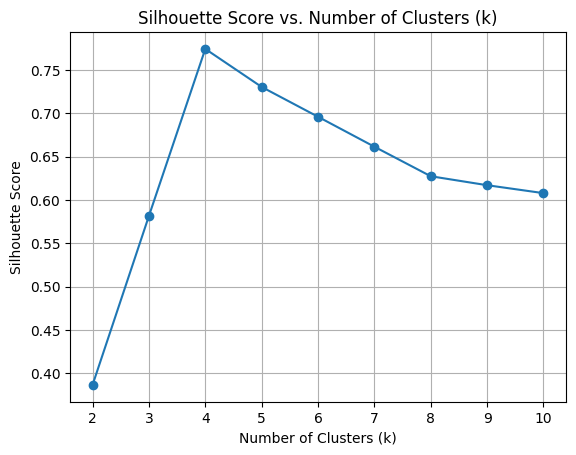

In [ ]:
# Plot Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
# Apply K-means with optimal clusters (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(feature)

In [107]:
# Calculate and display Davies-Bouldin Index

from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(feature, df['Cluster'])
print(f"Davies-Bouldin Index: {dbi}")


Davies-Bouldin Index: 0.3543065134794949


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


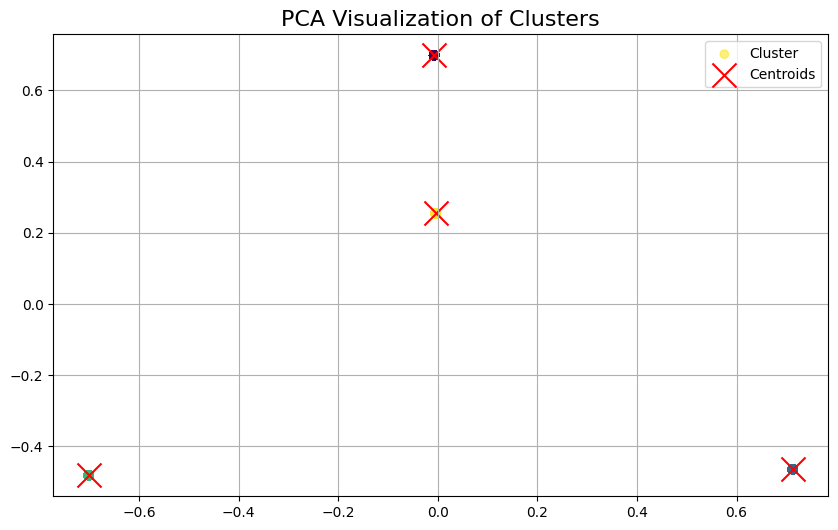

In [108]:
# PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature)
reduced_centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6, label='Cluster')
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('PCA Visualization of Clusters', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [109]:
cluster_summary = df.groupby('Cluster').agg({
    'Transaction_Amount': ['mean', 'std'],
    'Transaction_Count': ['mean', 'std'],
    'Avg_Transaction_Amount': ['mean', 'std'],
    'Transaction_Type_Bill Payment': 'mean',
    'Transaction_Type_Deposit': 'mean',
    'Transaction_Type_Transfer': 'mean',
    'Transaction_Type_Withdrawal': 'mean'
})
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary

,Transaction_Amount_mean,Transaction_Amount_std,Transaction_Count_mean,Transaction_Count_std,Avg_Transaction_Amount_mean,Avg_Transaction_Amount_std,Transaction_Type_Bill Payment_mean,Transaction_Type_Deposit_mean,Transaction_Type_Transfer_mean,Transaction_Type_Withdrawal_mean
Cluster,,,,,,,,,,
0,0.499476,0.289621,1.0,0.0,0.499476,0.289621,1.0,0.0,0.0,0.0
1,0.498396,0.289323,1.0,0.0,0.498396,0.289323,0.0,1.0,0.0,0.0
2,0.499454,0.286814,1.0,0.0,0.499454,0.286814,0.0,0.0,0.0,1.0
3,0.497861,0.288643,1.0,0.0,0.497861,0.288643,0.0,0.0,1.0,0.0


In [110]:
# Group by Cluster and Transaction Type to count occurrences
df_grouped = df.groupby(['Cluster', 'Transaction_Type'])['Transaction_ID'].count()

# For each cluster, find the most frequent transaction type
most_frequent_transactions = df_grouped.groupby('Cluster').idxmax()

# Display the results in a readable format
print("Most Frequent Transaction Type per Cluster:")
for cluster, transaction_type in most_frequent_transactions:
    print(f"Cluster {cluster} is dominated by {transaction_type} transactions.")


Most Frequent Transaction Type per Cluster:
Cluster 0 is dominated by Bill Payment transactions.
Cluster 1 is dominated by Deposit transactions.
Cluster 2 is dominated by Withdrawal transactions.
Cluster 3 is dominated by Transfer transactions.


Prediction

In [111]:
# Group customer IDs by clusters and store them in a dictionary
cluster_customers = df.groupby('Cluster')['Customer_ID'].apply(list)

# Display the customer IDs for each cluster
for cluster, customers in cluster_customers.items():
    print(f"Cluster {cluster} Customer IDs: {customers[:5]} (and {len(customers) - 5} more)")


Cluster 0 Customer IDs: ['046ac80f-8904-4294-be37-b31713c3148f', '194c741c-0def-4f57-875a-f6a0a7d6b757', 'c0451023-5ec6-40c9-90f1-5c6d85a74b41', 'c5f3c19a-24a5-44b2-8bf5-5170ee456396', '8892d258-a0ed-4f44-8573-e4c7d000d015'] (and 24933 more)
Cluster 1 Customer IDs: ['1f7e6274-e1a8-4139-b2ad-a00f36580bed', '067f0f2a-714c-4a13-9f4b-9c4975ca6e4c', '7676cb2e-258f-4c62-9645-d9435fec3391', '83c38073-993a-4c02-a105-39bda29ddd2a', '878521ad-0b70-4f07-adae-029ccf9891a5'] (and 25126 more)
Cluster 2 Customer IDs: ['f1425ca8-b0b5-4689-9fc9-ac857f202e8a', '30d7f0cd-66b9-4c3f-8a21-eb9c6ee2931b', '833f515d-1043-45e1-a867-1c78396125c6', '6096c9a4-2ec7-4ea4-bea3-6e91376ab09c', 'aea7c2f6-f525-43ba-9076-0abddd211d1b'] (and 25122 more)
Cluster 3 Customer IDs: ['b318556f-1fdd-4ee5-906b-ab23fd7b4504', 'e7d9bc6b-dd9d-4c6c-b018-ad4c470e1b68', 'bd4c1d0e-ec45-42df-a94d-2f3c3dfbbd5e', '0e16a52a-5b80-482d-b94e-b42e953c991b', 'a168f992-8b00-42a8-9aff-1e03fcf46bf9'] (and 24799 more)


In [112]:
import joblib

# Save the trained kmeans model
model_filename = "Customer_Segmentation_model.pkl"
joblib.dump(kmeans, model_filename)
print(f"Model saved as '{model_filename}'.")

Model saved as 'Customer_Segmentation_model.pkl'.
